No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Pixel location: 450 550
-0.5419460429905758
Cartesianx Coordinate: 0.5625 0.0625
vehicle x&y: 0 0.375
steer angle in degrees -31.051220987175462


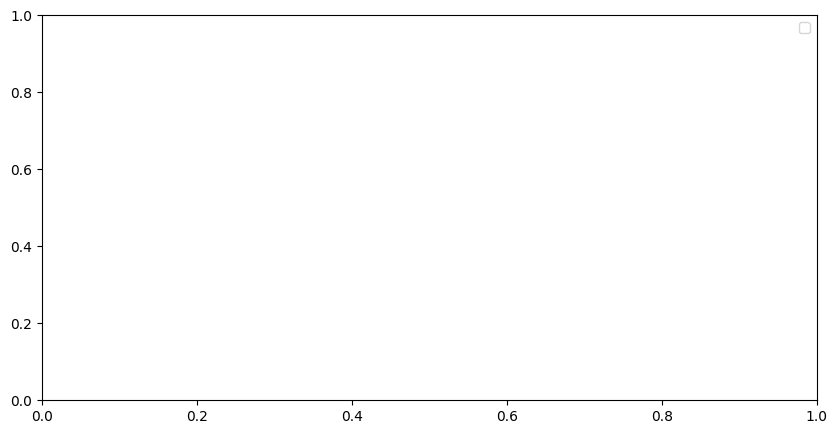

In [105]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import math


class Vehicle(object):

    #intialial position of vehicle
    def __init__(self, x=0.0, y=0.0, angle= 0.0, length=50.0):
        self.difference_distance = 0.0
        self.difference_rotation = 0.0
        self.difference_drift = 0.0
        self.length = length
        self.steer = 0



        #setting coordinates of vehicle
    def set(self, x, y, angle):

        self.x = x
        self.y = y
        self.angle = angle % (2.0 * np.pi)

    def set_difference(self, difference_rotation, difference_distance):
        self.difference_distance = difference_distance
        self.difference_rotation = difference_rotation

    def set_difference_drift(self, drift):
        self.difference_drift = drift

    #steering = angle of front wheel

    def drive(self, steer, distance, tolerance=0.001, max_allowed_steering =np.pi / 4.0):
         if steer > max_allowed_steering:
            steer = max_allowed_steering
         if steer < -max_allowed_steering:
            steer = -max_allowed_steering
         if distance < 0.0:
            distance = 0.0

         steer = random.gauss(steer, self.difference_rotation)
         distance = random.gauss(distance, self.difference_distance)

         steer += self.difference_drift
         print(steer)

         rotate = np.tan(steer * distance / self.length)
         if abs(rotate) < tolerance:
            
            self.x += distance * np.cos(self.angle)
            self.y += distance * np.sin(self.angle)
            self.angle = (self.angle + rotate) % (2.0 * np.pi)
         else: 
            radius = distance / rotate
            cx = self.x - (np.sin(self.angle) * radius)
            cy = self.y + (np.cos(self.angle) * radius)
            self.angle = (self.angle + rotate) % (2.0 * np.pi)
            self.x = cx + (np.sin(self.angle) * radius)
            self.y = cy - (np.cos(self.angle) * radius)

    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.angle)


class Middle_curve(object):
    def __init__(self, pixel_x = 0, pixel_y = 0):
        self.origin_x = 0
        self.origin_y = 0
        self.x_scaling_factor = 0.00125
        self.y_scaling_factor = 0.00125
        self.total_image_height = 600
        
        

    def set(self, pixel_x, pixel_y):

        self.pixel_x = pixel_x
        self.pixel_y = pixel_y

    def convert_pixels_to_cartesian(self, pixel_x, pixel_y):
        self.x_mid = (self.pixel_x - self.origin_x) * self.x_scaling_factor
        self.y_mid = (self.total_image_height - self.pixel_y - self.origin_y) * self.y_scaling_factor
        #print("Cartesian Coordinate:", self.x_mid, self.y_mid)
        return self.x_mid, self.y_mid
        

    def update_xymid(self, pixel_x, pixel_y):
        self.x_mid, self.y_mid = self.convert_pixels_to_cartesian(pixel_x, pixel_y)


middle_curve = Middle_curve()
middle_curve.set(450,550)
middle_curve.x_mid, middle_curve.y_mid = middle_curve.convert_pixels_to_cartesian(middle_curve.pixel_x, middle_curve.pixel_y)

vehicle = Vehicle()
vehicle.set(0, 0.375, 0)
vehicle.set_difference_drift(10/180.*np.pi)  # add drift bias

print("Pixel location:", middle_curve.pixel_x, middle_curve.pixel_y)



def run(vehicle, wp, wd, wi, n=100, speed=2.0):

    prev_cte = 0
    sum_cte = 0
    x_trajectory = []
    y_trajectory = []
    #steer = 0

    error_sum = 0  # for integral component of PID controller
    error_diff = 0  # for derivative component of PID controller
    error_prev = 0  # for derivative component of PID controller
    while True:

        x_trajectory = []
        y_trajectory = []
    
        cte_x = middle_curve.x_mid - vehicle.x
        #print(cte_x)
        cte_y = middle_curve.y_mid - vehicle.y
        error = np.sqrt(cte_x ** 2 + cte_y ** 2)
        dev = error - prev_cte
        sum_cte += error
        steer = wp*error + wi*sum_cte + wd*dev
        steer = (steer + np.pi/2) % (2 * np.pi/2) - np.pi/2
        prev_cte = error
        x_trajectory.append(vehicle.x)
        y_trajectory.append(vehicle.y)
        print(steer)
        #return x_trajectory, y_trajectory
        return steer

#print(vehicle.steer)


def calculate_steer_angle(steer):
    steer_angle = steer * 180/math.pi
    #print("angle", steer_angle)
    return steer_angle

steer = run(vehicle, 1.0, 3.0, 0.04)
steer_angle = calculate_steer_angle(steer)

print("Cartesianx Coordinate:", middle_curve.x_mid, middle_curve.y_mid)
print("vehicle x&y:", vehicle.x, vehicle.y)
print("steer angle in degrees", steer_angle)

#x_trajectory, y_trajectory = run(vehicle, 1.0, 3.0, 0.04)
#x_trajectory, y_trajectory = vehicle.run()
#steer = run(vehicle, 1.0, 3.0, 0.04)
#n = len(steer)

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
#ax1.plot(x_trajectory, y_trajectory, 'y', label='Vehicle Path')
#ax1.plot(x_trajectory, np.zeros(n), 'b', label='Center Line')
plt.legend()

    